In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, precision_recall_curve

from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [52]:
data = pd.read_csv("./Data/audit_data.csv")

In [53]:
data.head(3)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

Всего есть 25 признаков и 1 целевая переменная (бинарная) - нужно определить является ли организация мошеннической или нет

In [55]:
print(data.shape)

(776, 27)


###### Всего 776 организаций

### Обработка данных

In [56]:
# Посмотрим на соотношение классов
data.iloc[:, -1].value_counts()

0    471
1    305
Name: Risk, dtype: int64

In [57]:
# Проверим наличие пропусков в данных
display(data.isna().sum())

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [58]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.0,-0.22,-0.43,-0.22,-0.13,-0.22,-0.13,-0.15,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.087,-0.13,-0.11,-0.14,-0.1,-0.34,-0.17,-0.15,nan,-0.092,-0.39
PARA_A,-0.22,1.0,0.5,1.0,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.17,0.1,0.43,0.48,0.15,nan,0.22,0.38
Score_A,-0.43,0.5,1.0,0.5,0.25,0.57,0.25,0.3,0.24,0.27,0.27,0.21,0.48,0.2,0.089,0.094,0.1,0.18,0.27,0.15,0.72,0.32,0.17,nan,0.2,0.62
Risk_A,-0.22,1.0,0.5,1.0,0.17,0.36,0.17,0.27,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.18,0.11,0.43,0.48,0.15,nan,0.22,0.39
PARA_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.99,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.079,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89,0.26
Score_B,-0.22,0.36,0.57,0.36,0.35,1.0,0.35,0.38,0.28,0.31,0.3,0.21,0.57,0.2,-0.0047,0.093,0.015,0.2,0.31,0.17,0.9,0.37,0.13,nan,0.21,0.64
Risk_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.99,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.08,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89,0.26
TOTAL,-0.15,0.27,0.3,0.27,0.99,0.38,0.99,1.0,0.22,0.24,0.23,0.17,0.34,0.17,0.093,0.046,0.089,0.21,0.33,0.2,0.43,0.69,0.2,nan,0.89,0.29
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,0.22,1.0,0.91,0.96,0.19,0.45,0.19,0.13,0.036,0.14,0.2,0.21,0.2,0.5,0.27,0.23,nan,0.22,0.31
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.24,0.91,1.0,0.99,0.22,0.51,0.22,0.15,0.037,0.16,0.23,0.25,0.22,0.57,0.31,0.26,nan,0.26,0.35


In [59]:
# Выделим целевую пересенную
# Переменные TOTAL , LOCATION_ID и Detection_Risk исключаем из списка, т.к. TOTAL есть сумма признаков PARA_A и 
# PARA_B, а LOCATION_ID и Detection_Risk не оказывают сильного влияния на прдсказание целевой переменной. 
# Risk_A и Risk_B похоже на PARA_A','PARA_B -убираем
# District_Loss - убираем, после нормализации у него большие значения
# History, Inhertnt_Risk

feature_names = ['Sector_score', 'Score_A', 'PARA_A', 'Score_B', 'PARA_B', 'numbers',
                 'Score_B.1','Risk_C', 'Money_Value', 'Score_MV', 'PROB', 'RiSk_E', 'Risk_D',
                 'Prob', 'Risk_F', 'Score', 'CONTROL_RISK', 'Audit_Risk']
target_name = 'Risk'

In [60]:
data = data[feature_names + [target_name]]
data.head(2)

,Sector_score,Score_A,PARA_A,Score_B,PARA_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,PROB,RiSk_E,Risk_D,Prob,Risk_F,Score,CONTROL_RISK,Audit_Risk,Risk
0,3.89,0.6,4.18,0.2,2.50,5.0,0.2,1.0,3.38,0.2,0.2,0.4,0.676,0.2,0.0,2.4,0.4,1.7148,1
1,3.89,0.2,0.00,0.2,4.83,5.0,0.2,1.0,0.94,0.2,0.2,0.4,0.188,0.2,0.0,2.0,0.4,0.5108,0


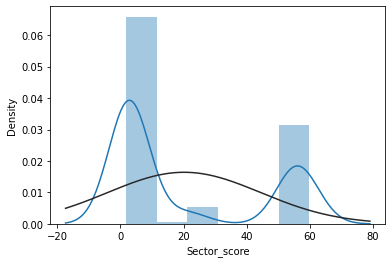

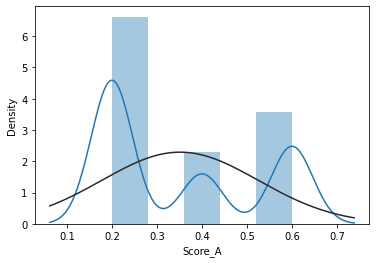

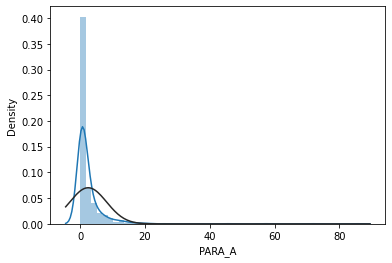

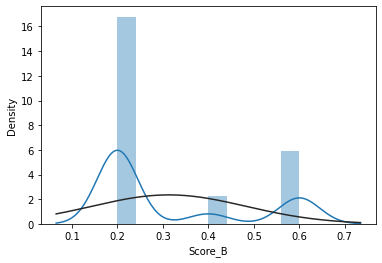

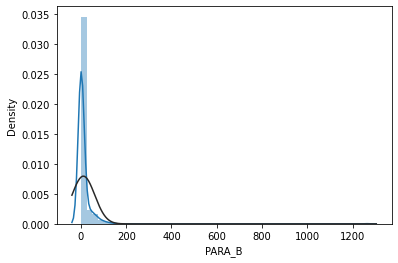

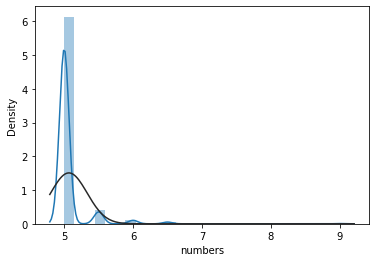

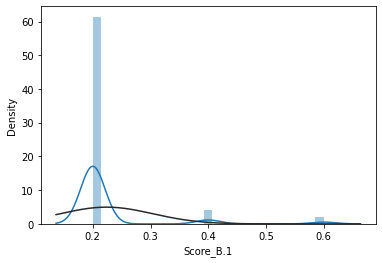

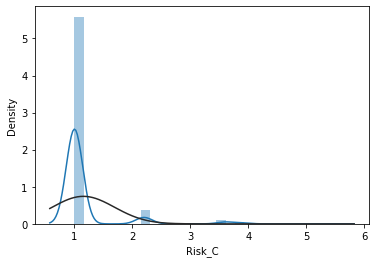

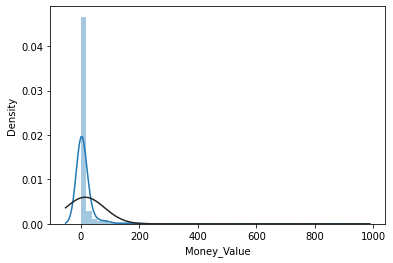

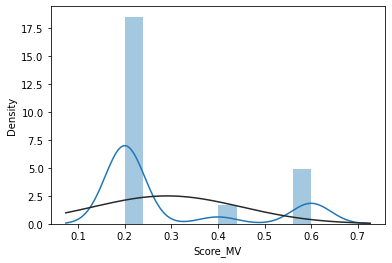

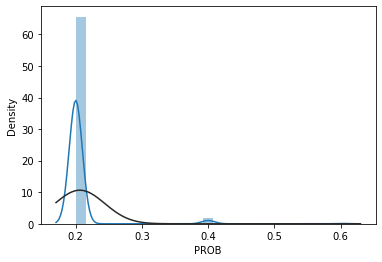

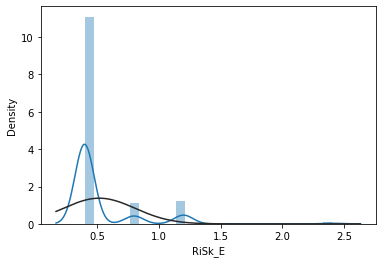

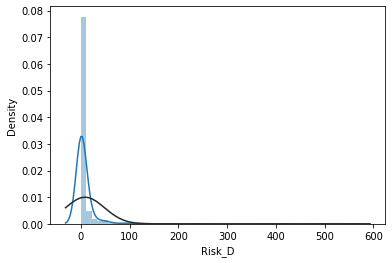

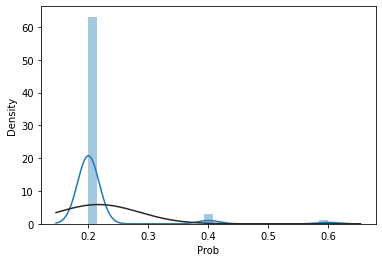

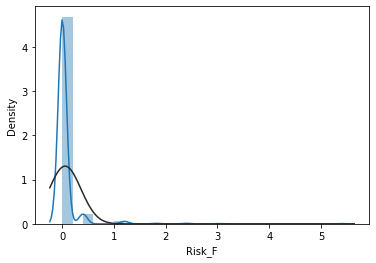

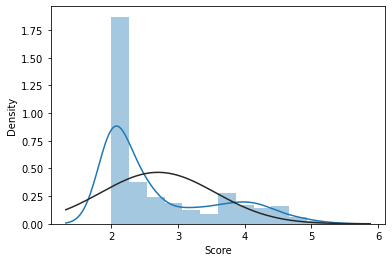

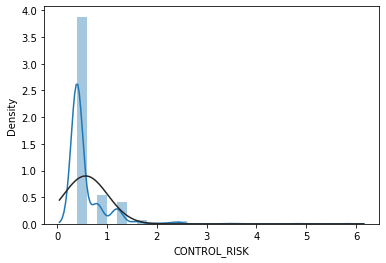

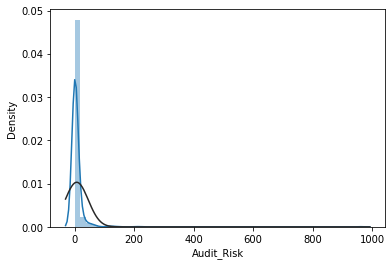

<Figure size 432x288 with 0 Axes>

In [61]:
for i in feature_names:
    sns.distplot(data[i], fit=norm);
    fig = plt.figure() 

In [62]:
list_for_transform = ['Sector_score', 'Score_A', 'Score_B', 'numbers', 
                      'Score_B.1','Risk_C', 'Score_MV', 'PROB', 'RiSk_E', 
                      'Prob', 'Score', 'CONTROL_RISK', 'Audit_Risk']
for i in list_for_transform:
    data[i] = np.log(data[i])

In [63]:
data = data.mask(np.isinf(data))

In [64]:
data = data.fillna(data.mean())
data.head(10)

,Sector_score,Score_A,PARA_A,Score_B,PARA_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,PROB,RiSk_E,Risk_D,Prob,Risk_F,Score,CONTROL_RISK,Audit_Risk,Risk
0,1.358409,-0.510826,4.18,-1.609438,2.50,1.609438,-1.609438,0.000000,3.38,-1.609438,-1.609438,-0.916291,0.676,-1.609438,0.0,0.875469,-0.916291,0.539296,1
1,1.358409,-1.609438,0.00,-1.609438,4.83,1.609438,-1.609438,0.000000,0.94,-1.609438,-1.609438,-0.916291,0.188,-1.609438,0.0,0.693147,-0.916291,-0.671777,0
2,1.358409,-1.609438,0.51,-1.609438,0.23,1.609438,-1.609438,0.000000,0.00,-1.609438,-1.609438,-0.916291,0.000,-1.609438,0.0,0.693147,-0.916291,-1.172474,0
3,1.358409,-1.609438,0.00,-0.510826,10.80,1.791759,-0.510826,1.280934,11.75,-0.510826,-1.609438,-0.916291,7.050,-1.609438,0.0,1.481605,-0.916291,1.254476,1
4,1.358409,-1.609438,0.00,-1.609438,0.08,1.609438,-1.609438,0.000000,0.00,-1.609438,-1.609438,-0.916291,0.000,-1.609438,0.0,0.693147,-0.916291,-1.261602,0
5,1.358409,-1.609438,0.00,-1.609438,0.83,1.609438,-1.609438,0.000000,2.95,-1.609438,-1.609438,-0.916291,0.590,-1.609438,0.0,0.693147,-0.916291,-0.841183,0
6,1.358409,-0.916291,1.10,-0.916291,7.41,1.609438,-1.609438,0.000000,44.95,-0.510826,-1.609438,-0.916291,26.970,-1.609438,0.0,1.163151,-0.916291,1.849210,1
7,1.358409,-0.510826,8.50,-0.510826,12.03,1.704748,-0.916291,0.788457,7.79,-0.916291,-1.609438,-0.916291,3.116,-1.609438,0.0,1.435085,-0.916291,1.282821,1
8,1.358409,-0.510826,8.40,-0.510826,11.05,1.704748,-0.916291,0.788457,7.34,-0.916291,-1.609438,-0.916291,2.936,-1.609438,0.0,1.435085,-0.916291,1.235820,1
9,1.358409,-0.510826,3.98,-1.609438,0.99,1.609438,-1.609438,0.000000,1.93,-1.609438,-1.609438,-0.916291,0.386,-1.609438,0.0,0.875469,-0.916291,-0.134217,0


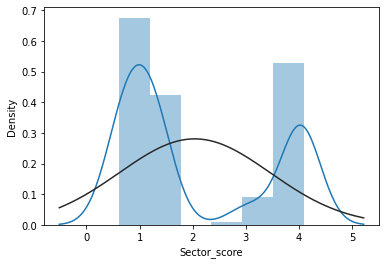

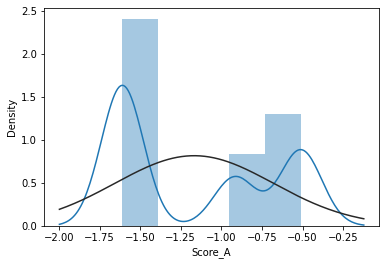

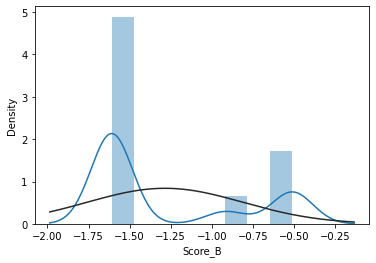

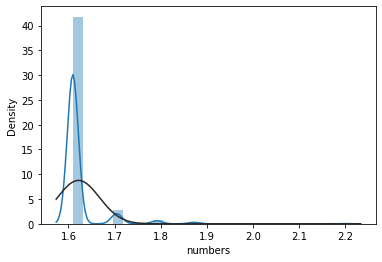

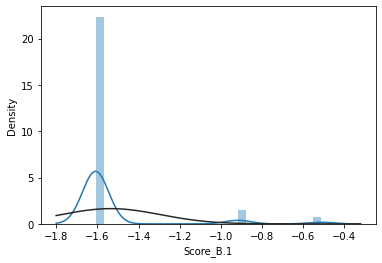

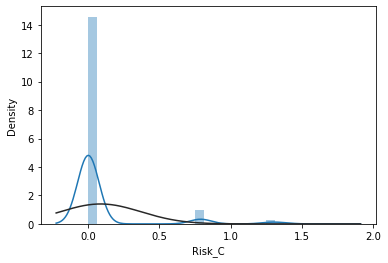

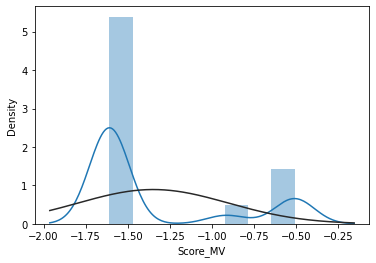

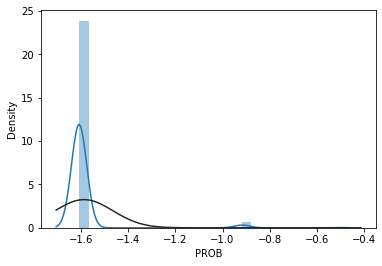

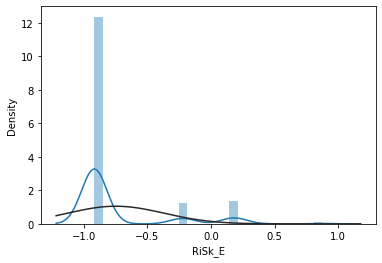

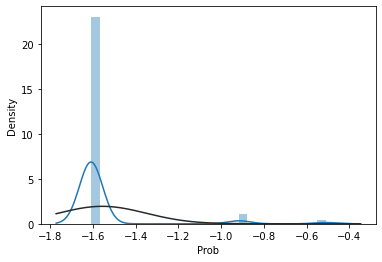

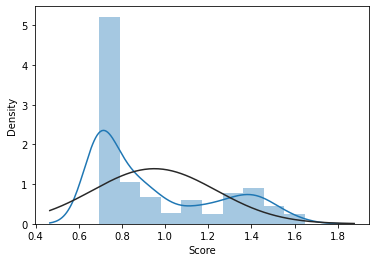

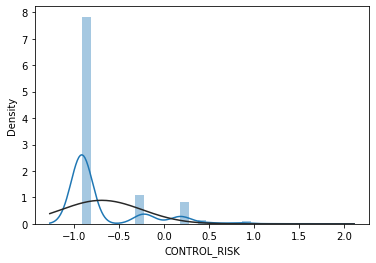

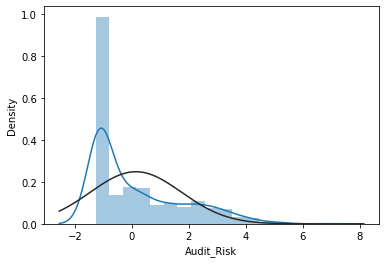

<Figure size 432x288 with 0 Axes>

In [65]:
for i in list_for_transform:
    sns.distplot(data[i], fit=norm);
    fig = plt.figure() 

In [66]:
display(data.isna().sum())

Sector_score    0
Score_A         0
PARA_A          0
Score_B         0
PARA_B          0
numbers         0
Score_B.1       0
Risk_C          0
Money_Value     0
Score_MV        0
PROB            0
RiSk_E          0
Risk_D          0
Prob            0
Risk_F          0
Score           0
CONTROL_RISK    0
Audit_Risk      0
Risk            0
dtype: int64

In [67]:
def preprocesing(df):
      
    # Стандартизируем признаки
    feature_names_for_stand = df.select_dtypes(include=['float64']).columns.tolist()

    scaler = StandardScaler()
    stand_features = scaler.fit_transform(df[feature_names_for_stand])

    df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)
    
    # Разбиваем данные
    X_data = df.iloc[:,:-1]
    y_data = df.iloc[:,-1]

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [68]:
X_train, X_test, y_train, y_test = preprocesing(data)

In [69]:
X_train.head(3)

,Sector_score,Score_A,PARA_A,Score_B,PARA_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,PROB,RiSk_E,Risk_D,Prob,Risk_F,Score,CONTROL_RISK,Audit_Risk
335,-0.827730,-0.905233,-0.431736,-0.682537,-0.215778,-0.270134,-0.306152,-0.303379,-0.21253,-0.581073,-0.168617,-0.446788,-0.20692,-0.255429,-0.175398,-0.894580,-0.494476,-0.883941
110,-0.478859,1.344637,0.031683,-0.682537,-0.164831,-0.270134,-0.306152,-0.303379,-0.21253,-0.581073,-0.168617,-0.446788,-0.20692,-0.255429,-0.175398,-0.259825,-0.494476,-0.314568
82,-0.478859,-0.905233,-0.431736,-0.682537,-0.215778,-0.270134,-0.306152,-0.303379,-0.21253,-0.581073,-0.168617,-0.446788,-0.20692,-0.255429,-0.175398,-0.894580,-0.494476,-0.883941


In [70]:
y_train.head(3)

335    0
110    0
82     0
Name: Risk, dtype: int64

### Обучаем несколько моделей

In [71]:
models = {    
    "LogisticRegression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),   
}

In [72]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

LogisticRegression trained.
K-Nearest Neighbors trained.


In [73]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

LogisticRegression: 97.85%
K-Nearest Neighbors: 94.85%


In [74]:
for name, model in models.items():    
    print('Classification results:', name)
    y_predict = model.predict(X_test)   
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0))    
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0))
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 

Classification results: LogisticRegression
f1: 97.33%
recall: 98.91%
precision: 95.79%
Classification results: K-Nearest Neighbors
f1: 93.55%
recall: 94.57%
precision: 92.55%


### Построим матрицы ошибок и посчитаем TPR, FPR, TNR

In [75]:
for name, model in models.items():    
    print('Classification results:', name)
    cnf_matrix = confusion_matrix(y_test, y_predict)
    print(cnf_matrix)
    TN = cnf_matrix[0][0]
    FN = cnf_matrix[1][0]
    TP = cnf_matrix[1][1]
    FP = cnf_matrix[0][1]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    TNR = TN/(FP+TN)
    print("TPR: %.2f%%" % (TPR), "FPR: %.2f%%" % (FPR), "TNR: %.2f%%" % (TNR))

Classification results: LogisticRegression
[[134   7]
 [  5  87]]
TPR: 0.95% FPR: 0.05% TNR: 0.95%
Classification results: K-Nearest Neighbors
[[134   7]
 [  5  87]]
TPR: 0.95% FPR: 0.05% TNR: 0.95%


### Вывод: исходя из значений метрик, для проекта будет использована модель LogReg